## Discretization Model
##### The following questions have to be answered to complete this task
###### 1. Discretize the sensor data using any of the methods discussed in class. Explain why you choose this method and why the obtained discretization makes sense
###### 2. Visualize the discretization
###### 3. Apply any of the sequential data mining methods (N-grams, Sequence alignment with kNN, …) to sliding windows with a length of your choosing in order to find anomalies
###### 4. Whenever an observed N-gram’s probability is too small, or the sequential data is too distant from any training sequence, raise an alarm
###### 5. Set your thresholds sensibly. 
###### 6. What kind of anomalies can you detect using the sequential model? 
###### 7. Which sensors can be modeled effectively?


1. Discretize the sensor data using any of the methods discussed in class. Explain why you choose this method and why the obtained discretization makes sense

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from sklearn import preprocessing
import numpy as np
import itertools
from itertools import islice
import pywt

In [25]:
from itertools import islice, tee
s = 'spam and eggs'
N = 3
trigrams = zip(*(islice(seq, index, None) for index, seq in enumerate(tee(s, N))))
list(trigrams)

[('s', 'p', 'a'),
 ('p', 'a', 'm'),
 ('a', 'm', ' '),
 ('m', ' ', 'a'),
 (' ', 'a', 'n'),
 ('a', 'n', 'd'),
 ('n', 'd', ' '),
 ('d', ' ', 'e'),
 (' ', 'e', 'g'),
 ('e', 'g', 'g'),
 ('g', 'g', 's')]

In [2]:
dataset03 = pd.read_csv("BATADAL_dataset03.csv")
dataset03.columns


Index(['DATETIME', 'L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7',
       'F_PU1', 'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4',
       'F_PU5', 'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8',
       'F_PU9', 'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2',
       'S_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415',
       'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG'],
      dtype='object')

In [3]:
dataset03= dataset03.drop("ATT_FLAG",axis=1,inplace=False) 
dataset03.head()
#dataset03 = dataset03.loc[:,dataset03.columns!='DATETIME']  # primary key, x axis
dataset03.head()
#X_scaled = preprocessing.scale(dataset03)
#print("X_scaled")
#print(X_scaled)

,DATETIME,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,...,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
0,06/01/14 00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,...,26.426495,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471
1,06/01/14 01,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,...,26.422962,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256
2,06/01/14 02,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,...,26.427771,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538
3,06/01/14 03,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,...,26.519985,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952
4,06/01/14 04,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,...,26.671642,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263


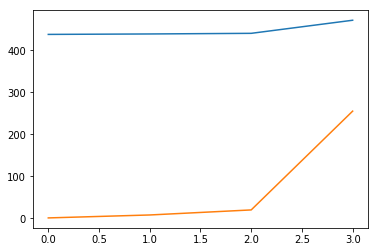

In [5]:
A = [437.479, 438.536, 440.026,471.161]
bins = np.linspace(np.amin(A),np.amax(A),255) 
discretized_A = np.digitize(A, bins) 
plt.plot(A)
plt.plot(discretized_A)
plt.show()

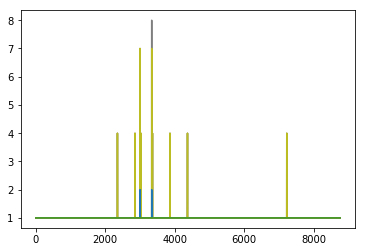

In [47]:
A = X_scaled
bins = np.linspace(np.amin(A),np.amax(A),8) 
discretized_A = np.digitize(A, bins) 
#plt.plot(A)
plt.plot(discretized_A)
plt.show()

In [74]:
cA, cD = pywt.dwt([1, 2, 3, 4], 'db3') # db1 is Daubechies in discrrete form

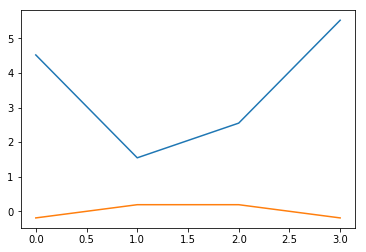

In [75]:
plt.plot(cA)
plt.plot(cD)
plt.show()
#pywt.wavelist(kind='discrete')

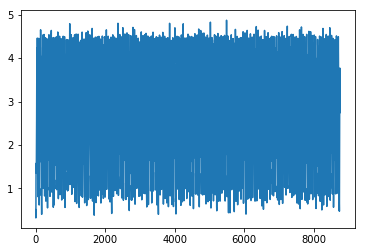

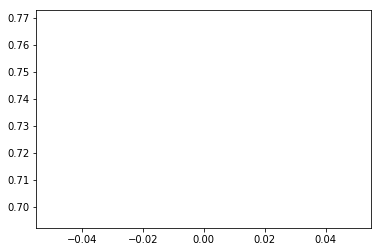

In [18]:
#discretize
a = dataset03['L_T1']
plt.plot(a)
plt.show()
q = 3
discretize = np.percentile(a,q,axis=0,interpolation ='linear')
plt.plot(discretize)
plt.show()